# Environment setup

In [1]:
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Basic 1: Create a directories and copy training data


In [2]:

# check if folder exists, create it if it doesn't, then enter it
def checkCreateEnterFolder(folderName):
    if not os.path.isdir(folderName):
        os.mkdir(folderName)
    os.chdir(folderName)

def copyFileFromDownloads(filename):
    shutil.copyfile ('/home/michael/Downloads/' + filename, os.getcwd() + '/' + filename)    
    
# go to Desktop
os.chdir('/home/michael/Desktop')
# check for, create if needed, then enter folders
checkCreateEnterFolder('python_files')
checkCreateEnterFolder('week5')

dataFile = 'train_titanic.csv'
copyFileFromDownloads(dataFile)


# Basic 2: Show info() and describe dataframe

In [3]:
df = pd.read_csv(dataFile)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
print('In this dataframe, there are 891 entries representing all the passengers. ',
      '204 passengers are in cabins, and we only have the age for 714 passengers. ',
      'There is information for Embarked for only 889 of the 891 passengers, which',
      'could mean that those two passengers didn\'t embark or the data might just',
      'be missing.  There are 12 columns and 7 of the columns contain numbers,',
      ' while 5 of them contains objects. The whole dataframe uses 83.6 kB of memory')

In this dataframe, there are 891 entries representing all the passengers.  204 passengers are in cabins, and we only have the age for 714 passengers.  There is information for Embarked for only 889 of the 891 passengers, which could mean that those two passengers didn't embark or the data might just be missing.  There are 12 columns and 7 of the columns contain numbers,  while 5 of them contains objects. The whole dataframe uses 83.6 kB of memory


# Basic 3: Drop row where index = 1

In [5]:
# copy dataframe as a modified one
df_mod = df.copy()
# drop the row where index = 1
df_mod = df_mod.drop([1])
df_mod.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    890 non-null int64
Survived       890 non-null int64
Pclass         890 non-null int64
Name           890 non-null object
Sex            890 non-null object
Age            713 non-null float64
SibSp          890 non-null int64
Parch          890 non-null int64
Ticket         890 non-null object
Fare           890 non-null float64
Cabin          203 non-null object
Embarked       888 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.4+ KB


# Basic 4: Drop Embarked column

In [6]:
# drop the embarked column from the df_mod dataframe
df_mod =  df_mod.drop(columns=['Embarked'])
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    890 non-null int64
Survived       890 non-null int64
Pclass         890 non-null int64
Name           890 non-null object
Sex            890 non-null object
Age            713 non-null float64
SibSp          890 non-null int64
Parch          890 non-null int64
Ticket         890 non-null object
Fare           890 non-null float64
Cabin          203 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.4+ KB


# Basic 5: drop rows with nulls

In [7]:
# df.isnull() creates a Pandas dataframe of booleans where null entries are located
# df.isnull().any(axis=1) creates a Pandas series of booleans where null rows are located
# ~df.isnull().any(axis=1) inverts the logic using the tilde to get the Panda series of booleans
#                          where NON-null rows are located
df_mod = df_mod[~df_mod.isnull().any(axis=1)]
df_mod.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 3 to 889
Data columns (total 11 columns):
PassengerId    184 non-null int64
Survived       184 non-null int64
Pclass         184 non-null int64
Name           184 non-null object
Sex            184 non-null object
Age            184 non-null float64
SibSp          184 non-null int64
Parch          184 non-null int64
Ticket         184 non-null object
Fare           184 non-null float64
Cabin          184 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 17.2+ KB


After dropping the rows that contain nulls, there are only 184 rows.

# Basic 6: Plot fare histogram

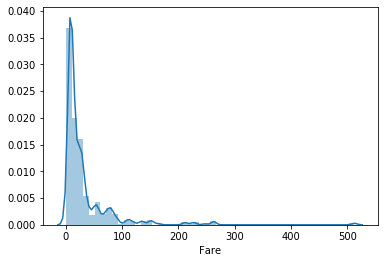

In [8]:
sns.distplot(df['Fare'], bins=50);


# Basic 7: Survived Histogram

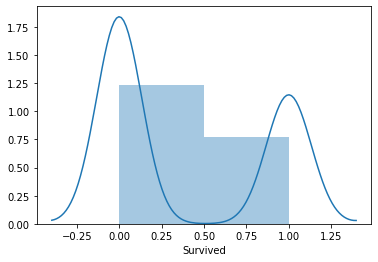

In [9]:
sns.distplot(df['Survived'], bins=2);

# Basic 8: Correlation Matrix

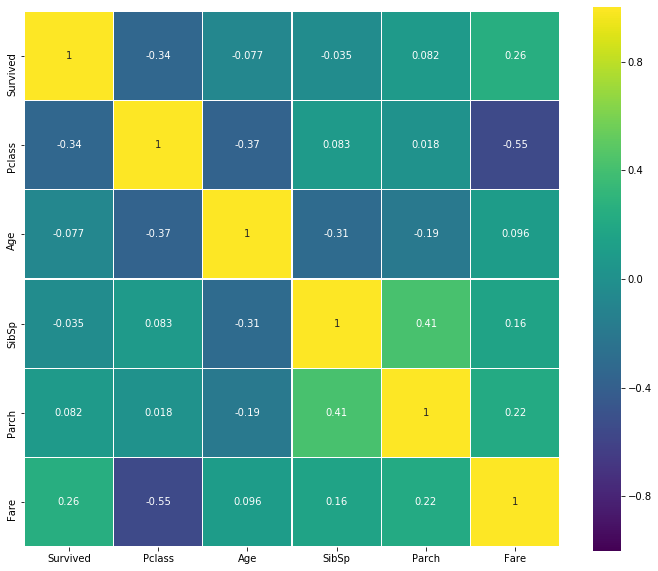

In [10]:
# drop the Passenger Id since this is only an identifier and doesn't need to be correlated to anything
corr = df.drop('PassengerId', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.01) | (corr <= -0.01)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);

# Basic 9: Interpret Correlation Matrix

In [11]:
print('From the correlation matrix, we can see the highest correlation to survival is',
      'most correlated to Age, where the correlation is -0.25.  This means older people',
      'had the least chance of survival.  It would be interesting to turn the sex (male/female)',
      'into a number so that it can be correlated against the other data. ',
      'Another correlation that stands out is the Passenger class (Pclass), which is',
      'most correlated to the Fare they paid, but also correlated to Age and Survived.'
      'The higher the age, the lower the class, so there are mostly older people in',
      'first class, and they paid the most in Fare.')

From the correlation matrix, we can see the highest correlation to survival is most correlated to Age, where the correlation is -0.25.  This means older people had the least chance of survival.  It would be interesting to turn the sex (male/female) into a number so that it can be correlated against the other data.  Another correlation that stands out is the Passenger class (Pclass), which is most correlated to the Fare they paid, but also correlated to Age and Survived.The higher the age, the lower the class, so there are mostly older people in first class, and they paid the most in Fare.


# Advanced 1: new column doubleFare

In [12]:
# get a copy of the original data because we removed all the rows with nulls in Basic
df_adv = df.copy()
# insert new column in 10th position called "doubledFare" that equals the "Fare" column * 2
df_adv.insert(10, "doubledFare", df_adv['Fare']*2, True)
df_adv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
doubledFare    891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


# Advanced 2: fill null age by mean age

In [13]:
meanAge = round(df_adv['Age'].mean(skipna = True))
df_adv.loc[(df_adv['Age'].isnull()),'Age'] = meanAge

# check
# print(df_adv['Age'])


# Advanced 3: Scatter plot age to fare

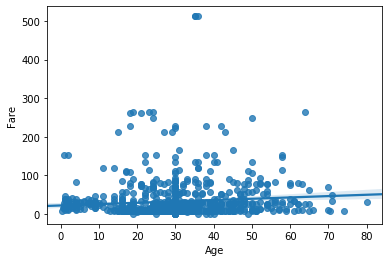

In [14]:
ax = sns.regplot(x='Age', y='Fare', data=df_adv)


From the scatter plot the fare paid seems almost evenly distributed by age, however, the trend is slightly upwards which suggests older people paid more Fare.  There are a few outliers who paid over 500, and also a few over 200.  Most fares were less than 50.  There were also a lot of children under 20 years of age who paid the average fare, but some children paid more, likely to accompany their parents in first class cabins.

# Advanced 4: Present using groupby

In [15]:
df_adv.groupby(['Survived']).count()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,doubledFare,Cabin,Embarked
Survived,,,,,,,,,,,,
0,549,549,549,549,549,549,549,549,549,549,68,549
1,342,342,342,342,342,342,342,342,342,342,136,340


In [16]:
df_adv.groupby(['Survived']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,doubledFare
Survived,,,,,,,
0,447.016393,2.531876,30.483607,0.553734,0.329690,22.117887,44.235774
1,444.368421,1.950292,28.595526,0.473684,0.464912,48.395408,96.790815


In [17]:
df_adv.groupby(['Survived']).std()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,doubledFare
Survived,,,,,,,
0,260.640469,0.735805,12.454065,1.288399,0.823166,31.388207,62.776413
1,252.358840,0.863321,13.776751,0.708688,0.771712,66.596998,133.193996


# Advanced 5: Find top 3 correlated attributes to survive

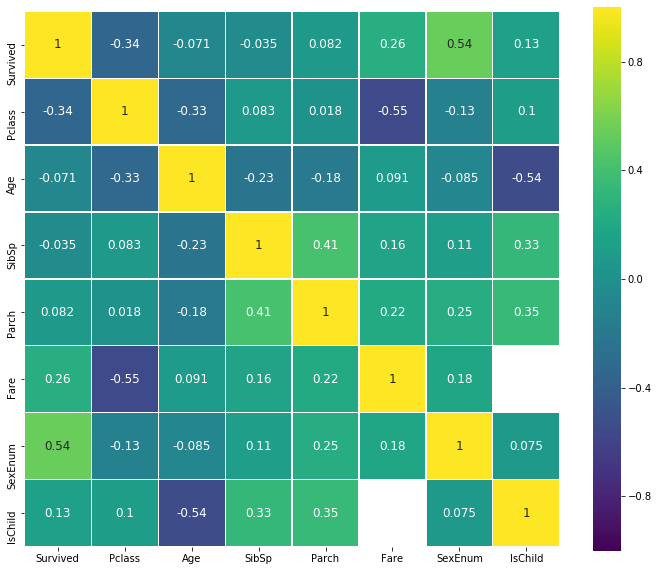

In [18]:
df_adv5 = df_adv.copy()

# drop the doubledFare column because it has the same correlation as Fare
df_adv5 = df_adv5.drop(['doubledFare'], axis=1)
# drop the passenger ID because it's just an identification number
df_adv5 = df_adv5.drop('PassengerId', axis=1)

# create a new column with female = 1 and male = 0
df_adv5.loc[df_adv5['Sex']=='female','SexEnum'] = 1
df_adv5.loc[df_adv5['Sex']=='male','SexEnum'] = 0

# create a new column with IsChild = 1 for age less than 10
df_adv5.loc[df_adv5['Age'] < 10,'IsChild'] = 1
df_adv5.loc[df_adv5['Age'] >= 10,'IsChild'] = 0

corr_adv = df_adv5.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_adv[(corr_adv >= 0.01) | (corr_adv <= -0.01)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True);


The top three correlations in the data for survival were the SexEnum, Pclass, and Fare.  The high SexEnum correlation indicates that women most likely survived.  The high Pclass correlation means that passengers in higher Passenger Classes, such as first class, were more likely to survive.  Finally those who paid more in fare were more likely to survive, however, this correlation is related to the high Pclass since those who paid more are also in a higher Pclass.